# 1. Carga de Datos:
#### o Importa las bibliotecas necesarias (pandas, numpy, matplotlib.pyplot).
#### o Carga el archivo co-emissions-per-capita new.csv en un DataFrame de pandas.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [11]:
df = pd.read_csv('co-emissions-per-capita new.csv')

2. Exploración Básica:
o Muestra las primeras 5 filas del DataFrame.
o Muestra el resumen estadístico del DataFrame.
o Muestra la información del DataFrame (tipo de datos, valores nulos, etc.

In [12]:
df.head(5)

,Entity,Year,Annual CO₂ emissions (per capita)
0,Africa,1750,0
1,Andorra,1750,0
2,Asia,1750,0
3,Asia (excl. China and India),1750,0
4,Australia,1750,0


In [13]:
df.sample()

,Entity,Year,Annual CO₂ emissions (per capita)
14401,Upper-middle-income countries,1968,19.900.099


In [14]:
df['Annual CO₂ emissions (per capita)']=df[('Annual CO₂ emissions (per capita)')].str.replace('.','')
df['Annual CO₂ emissions (per capita)']=df[('Annual CO₂ emissions (per capita)')].astype('int')
df['Annual CO₂ emissions (per capita)']=df[('Annual CO₂ emissions (per capita)')]/1000000
df=df.rename(columns={'Annual CO₂ emissions (per capita)':'por capital/millones'})

In [15]:
df.info

<bound method DataFrame.info of                              Entity  Year  por capital/millones
0                            Africa  1750              0.000000
1                           Andorra  1750              0.000000
2                              Asia  1750              0.000000
3      Asia (excl. China and India)  1750              0.000000
4                         Australia  1750              0.000000
...                             ...   ...                   ...
26595             Wallis and Futuna  2022             22.819076
26596                         World  2022              4.658219
26597                         Yemen  2022             33.701748
26598                        Zambia  2022             44.570068
26599                      Zimbabwe  2022              0.542628

[26600 rows x 3 columns]>

In [16]:
df.describe()

,Year,por capital/millones
count,26600.000000,26600.000000
mean,1949.096880,21.825566
std,56.387496,23.257553
min,1750.000000,0.000000
25%,1915.000000,5.485310
50%,1963.000000,13.275922
75%,1994.000000,31.136264
max,2022.000000,156.861925


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26600 entries, 0 to 26599
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                26600 non-null  object 
 1   Year                  26600 non-null  int64  
 2   por capital/millones  26600 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 623.6+ KB


In [19]:
#DICCIONARIO
nulos={"Entity":int(df["Entity"].isnull().sum())}
nulos={"Year":int(df["Year"].isnull().sum())}
nulos={"por capital/millones)":int(df["por capital/millones"].isnull().sum())}
nulos

{'por capital/millones)': 0}

3. Limpieza de Datos:

o Verifica si hay valores nulos en el DataFrame.

o Si existen valores nulos, decide una estrategia para manejarlos (puedes optar por rellenar o eliminar).

o Muestra un resumen de los valores únicos en cada columna

In [20]:
# no tiene nulos
nulos

{'por capital/millones)': 0}

In [21]:
#Resumen de valores unicos
for colum in df.columns:
    print(f"{colum}:{df[colum].nunique()} valores unicos")

Entity:231 valores unicos
Year:228 valores unicos
por capital/millones:24407 valores unicos


4. Análisis Exploratorio:

o Calcula y muestra la media, mediana y moda de las emisiones de CO2 per cápita.

o Realiza un análisis de la distribución de los datos utilizando histogramas.

o Crea un gráfico de barras para mostrar las emisiones de CO2 per cápita de los 10 países con mayores emisiones.

o Crea un gráfico de líneas que muestre la tendencia de las emisiones de CO2 per cápita a lo largo del tiempo (si los datos incluyen una dimensión temporal).

In [22]:
# Calcular métricas estadísticas básicas para las emisiones de CO2 per cápita
column_name = "por capital/millones" 
mean_value = df[column_name].mean()
median_value = df[column_name].median()
mode_value = df[column_name].mode()[0]

print("\nEstadísticas de emisiones de CO2 per cápita:")
print(f"Media: {mean_value}")
print(f"Mediana: {median_value}")
print(f"Moda: {mode_value}")


Estadísticas de emisiones de CO2 per cápita:
Media: 21.82556590131579
Mediana: 13.275922
Moda: 0.0


Index(['Entity', 'Year', 'por capital/millones'], dtype='object')


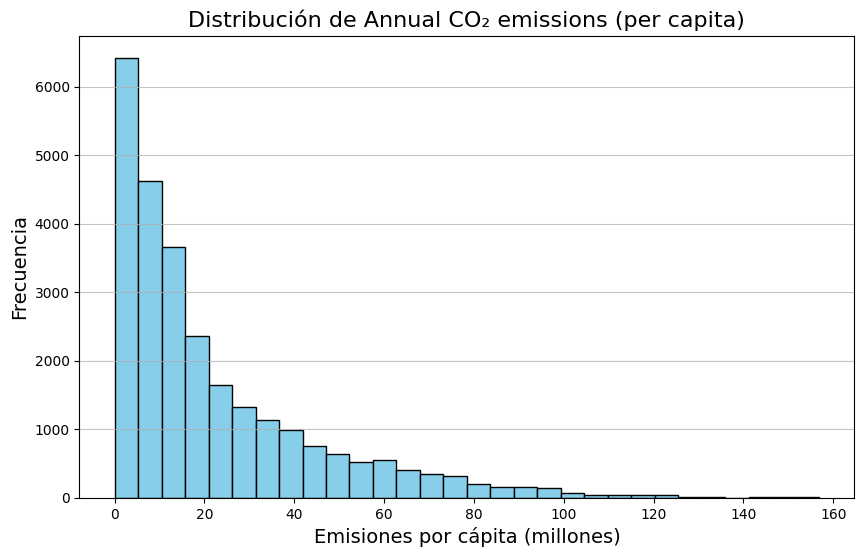

In [24]:
# Verifica las columnas disponibles
print(df.columns)

# Selecciona la columna para analizar (ejemplo: 'Annual CO₂ emissions (per capita)')
columna = 'por capital/millones'

# Asegúrate de que los datos sean numéricos
df[columna] = pd.to_numeric(df[columna], errors='coerce')

# Crea el histograma
plt.figure(figsize=(10, 6))
plt.hist(df[columna].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Annual CO₂ emissions (per capita)', fontsize=16)
plt.xlabel('Emisiones por cápita (millones)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

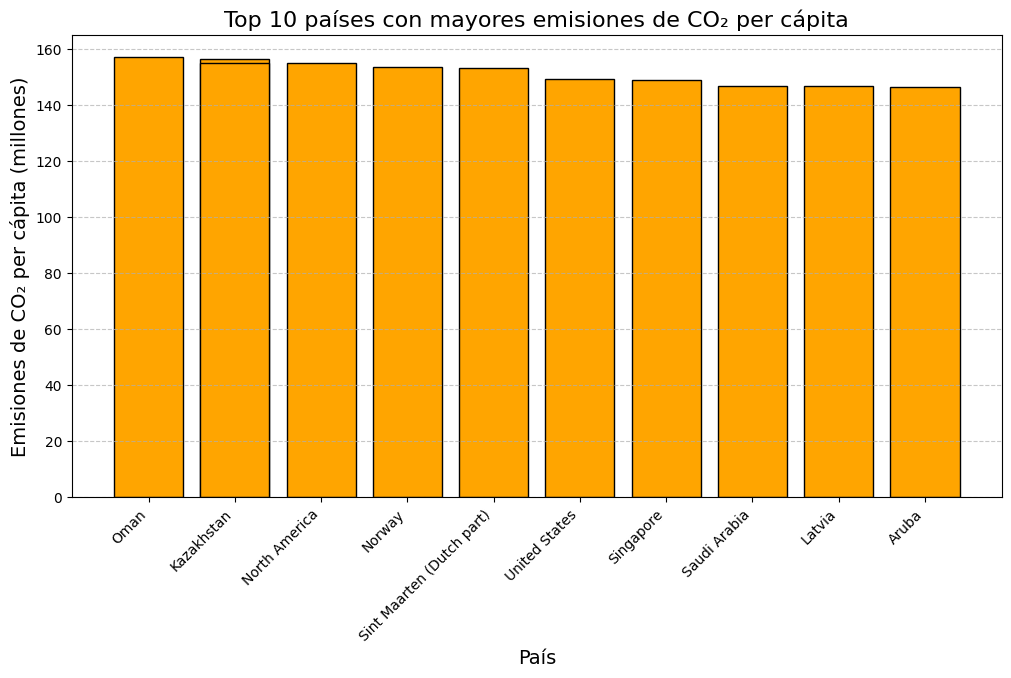

In [26]:
# Asegúrate de que la columna 'Annual CO₂ emissions (per capita)' sea numérica
df['por capital/millones'] = pd.to_numeric(df['por capital/millones'], errors='coerce')

# Filtrar los 10 países con mayores emisiones
top_10_paises = df[['Entity', 'por capital/millones']].sort_values(
    by='por capital/millones', ascending=False).head(11)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_10_paises['Entity'], top_10_paises['por capital/millones'], color='orange', edgecolor='black')
plt.title('Top 10 países con mayores emisiones de CO₂ per cápita', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Emisiones de CO₂ per cápita (millones)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

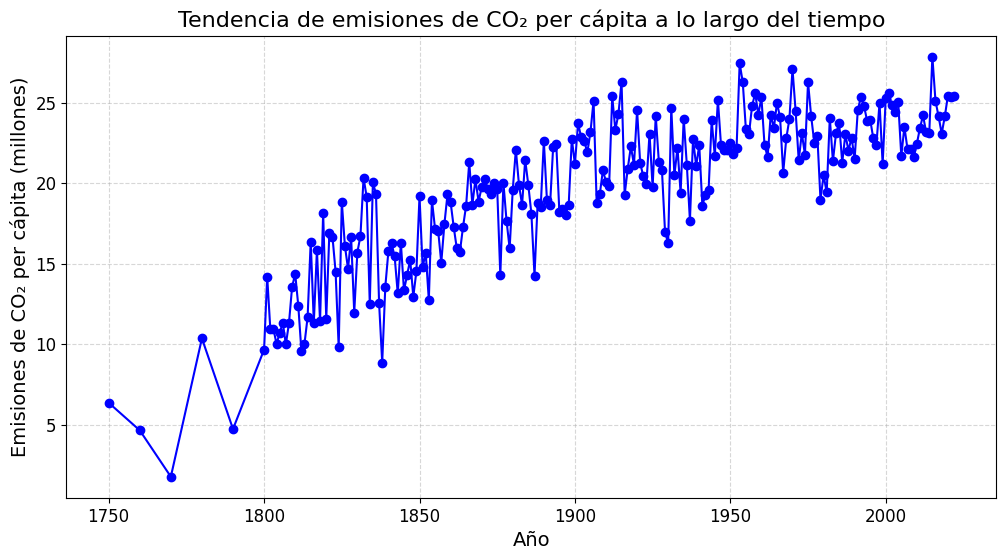

In [27]:
# Asegúrate de que las columnas 'Year' y 'Annual CO₂ emissions (per capita)' sean numéricas
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['por capital/millones'] = pd.to_numeric(df['por capital/millones'], errors='coerce')

# Filtrar datos relevantes (si es necesario)
df_filtrado = df[['Year', 'por capital/millones']].groupby('Year').mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(df_filtrado['Year'], df_filtrado['por capital/millones'], color='blue', marker='o')
plt.title('Tendencia de emisiones de CO₂ per cápita a lo largo del tiempo', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Emisiones de CO₂ per cápita (millones)', fontsize=14)
plt.grid(alpha=0.5, linestyle='--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

5. Interpretación de Resultados:

o Escribe un breve análisis interpretando los resultados obtenidos. ¿Qué

observaciones puedes hacer sobre los datos de emisiones de CO2 per cápita?

análisis sobre las emisiones de CO₂ per cápita basado en los gráficos creados:

Observaciones generales:

1. Distribución de las emisiones (Histograma):

La mayoría de los países tienen emisiones de CO₂ per cápita concentradas en valores bajos, lo que indica que las emisiones per cápita tienden a ser moderadas en la mayoría de las naciones.

Existen valores atípicos (outliers) en el extremo derecho del histograma, lo que sugiere que algunos países tienen emisiones per cápita considerablemente altas, posiblemente debido a su alta industrialización o dependencia de combustibles fósiles.



2. Top 10 países emisores (Gráfico de barras):

Los países con mayores emisiones de CO₂ per cápita son, en su mayoría, naciones altamente desarrolladas o con economías dependientes de industrias intensivas en carbono, como el petróleo y el gas.

Esto podría reflejar altos niveles de consumo energético per cápita o una falta de transición hacia energías renovables.



3. Tendencia temporal (Gráfico de líneas):

Si el gráfico muestra un aumento constante en las emisiones de CO₂ per cápita, esto podría estar asociado al crecimiento industrial y poblacional global, especialmente en países en desarrollo.

Si se observa una disminución en años recientes, esto podría ser un indicio de la implementación de políticas climáticas, mejoras en eficiencia energética o la adopción de tecnologías limpias.

Es posible identificar eventos históricos o económicos que impactaron las emisiones, como crisis financieras, acuerdos climáticos globales (e.g., Protocolo de Kioto, Acuerdo de París) o pandemias que redujeron la actividad económica.




Reflexiones:

Impacto de los países desarrollados: Los países con mayores emisiones per cápita probablemente tienen un estilo de vida con alta huella de carbono, lo que indica la necesidad de transitar hacia economías más sostenibles.

Desigualdad en emisiones: Los datos sugieren que las emisiones de CO₂ no están distribuidas equitativamente entre los países, lo que refleja diferencias en niveles de desarrollo, consumo energético y políticas ambientales.

Oportunidades de mejora: Los países con altas emisiones per cápita tienen un mayor potencial para reducir su impacto adoptando tecnologías limpias, mejorando la eficiencia energética y diversificando sus fuentes de energía.


Este análisis puede ser ampliado combinándolo con otros datos, como emisiones totales por país, contribución histórica y progreso hacia metas climáticas globales.